In [1]:
import os, pandas as pd, numpy as np

In [3]:
os.chdir("C:\\Users\\Adarsh\\Favorites\\Bootcamp\\R\\Assignment 1")

In [5]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [6]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [11]:
CHTSD = df[df['state']==22]

In [13]:
CHTSD.isnull().sum().sort_values(ascending = False)

soyabean_q        2169
soyabean_v        2169
Meals_Employer    2138
Meals_School      2133
Meals_Payment     2073
                  ... 
palak_q              0
carrot_q             0
radish_q             0
brinjal_q            0
fv_tot               0
Length: 384, dtype: int64

In [15]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [17]:
CHTSD_new = CHTSD[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [19]:
CHTSD_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       32
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [23]:
CHTSD_clean = CHTSD_new.copy()

In [27]:
CHTSD_clean.loc[:, 'Meals_At_Home'] = CHTSD_clean['Meals_At_Home'].fillna(CHTSD_new['Meals_At_Home'].mean())

In [29]:
CHTSD_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [17]:
# Outlier Checking

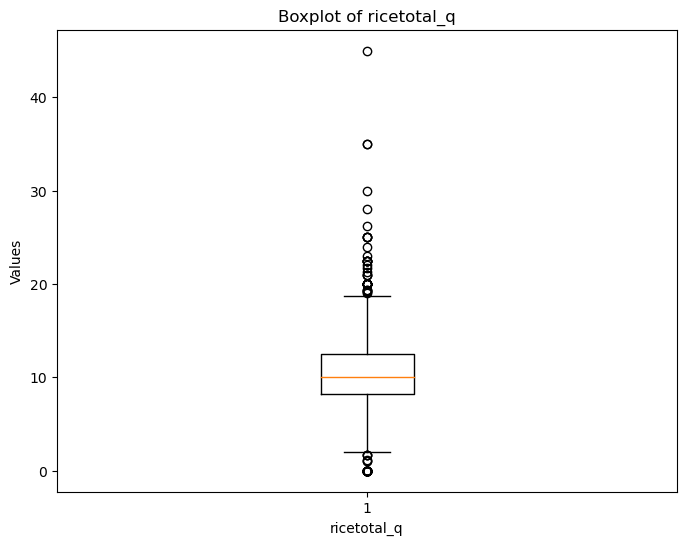

In [31]:
import matplotlib.pyplot as plt
# Assuming CHTSD_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(CHTSD_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [36]:
rice1 = AP_clean['ricetotal_q'].quantile(0.25)
rice2 = AP_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [37]:
AP_clean=AP_new[(AP_new['ricetotal_q']<=up_limit)&(AP_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x21a91a17850>,
 'caps': [<matplotlib.lines.Line2D at 0x21a91a18c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a90bb5410>],
 'medians': [<matplotlib.lines.Line2D at 0x21a91a19e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a91a18650>],
 'means': []}

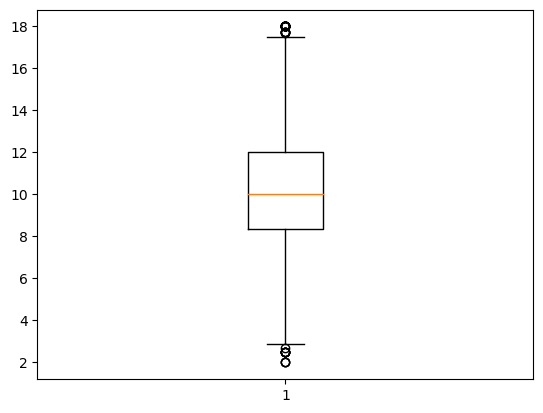

In [39]:
plt.boxplot(AP_clean['ricetotal_q'])

In [33]:
CHTSD_clean['District'].unique()

array([10,  7,  8,  9,  6, 11,  5,  4,  3,  2,  1, 14, 13, 12, 15, 16, 17,
       18], dtype=int64)

In [35]:
# Replace values in the 'Sector' column
CHTSD_clean.loc[:,'Sector'] = CHTSD_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [27]:
#total consumption

In [37]:
CHTSD_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [41]:
CHTSD_clean.loc[:, 'total_consumption'] = CHTSD_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [43]:
CHTSD_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
1357,CHTSD,10,RURAL,2,222,6.000000,4.000000,0.0,0,0.60,0.0,28.850510,50.000000,60.0,89.450510
1358,CHTSD,10,RURAL,2,222,3.750000,5.000000,0.0,0,0.25,0.0,25.762998,50.000000,54.0,84.762997
1359,CHTSD,10,RURAL,2,222,5.000000,3.750000,0.0,0,0.75,0.0,18.925525,26.250000,60.0,54.675525
1360,CHTSD,10,RURAL,2,222,4.166667,1.666667,0.0,0,0.50,0.0,19.583819,33.333333,60.0,59.250486
1361,CHTSD,10,RURAL,2,222,5.000000,1.750000,0.0,0,0.00,0.0,19.262790,20.000000,40.0,46.012790


In [45]:
CHTSD_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              15.471583  43.546859  134.694228  19.451233
2              29.361251  51.235081  324.101410   0.000000
3              25.968442  49.722346  283.401220   0.000000

In [47]:
CHTSD_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                21.307476  49.021748  134.694228  30.467332
2                12.507373  41.721896  117.743645  19.451233
3                27.395103  48.933274  222.200000  17.125113
4                31.202745  54.161049  232.431630   0.000000
5                26.532139  47.520160  209.350233  22.333458
6                29.362535  52.972898  178.925212  15.571618
7                24.448006  48.069256  193.434323  22.764429
8                22.451994  48.942477  128.488338  10.900000
9                19.267597  45.707682  108.510255  15.000000
10               21.895811  47.382447  156.556612  18.500250
11               41.929085  58.699029  324.101410   0.250000
12               32.434139  57.941679  201.600500  17.833543
13               26.532226  50.757653  154.926640   0.000000
14               19.797711  50.454743  119.433704  15.000000
15               29.340258  49.615321  283.401220  18.650073
16               26.849435  53.721427  129.420455   0.000000
17               21.896704  45.856174  123.433667   0.000000
18               30.525468  46.445948  133.895828   0.000000

In [49]:
total_consumption_by_districtcode=CHTSD_clean.groupby('District')['total_consumption'].sum()

In [51]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
11    14909.553257
10    12129.906402
7      8844.743094
Name: total_consumption, dtype: float64

In [53]:
CHTSD_clean.loc[:,"District"] = CHTSD_clean.loc[:,"District"].replace({11: "Raipur", 10: "Durg", 7: "Bilaspur"})

In [55]:
total_consumption_by_districtname=CHTSD_clean.groupby('District')['total_consumption'].sum()

In [57]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Raipur      14909.553257
Durg        12129.906402
Bilaspur     8844.743094
Name: total_consumption, dtype: float64

In [61]:
from statsmodels.stats import weightstats as stests

In [62]:
rural=CHTSD_clean[CHTSD_clean['Sector']=="RURAL"]
urban=CHTSD_clean[CHTSD_clean['Sector']=="URBAN"]

In [65]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
1357,CHTSD,Durg,RURAL,2,222,6.000000,4.000000,0.0,0,0.60,0.0,28.850510,50.000000,60.0,89.450510
1358,CHTSD,Durg,RURAL,2,222,3.750000,5.000000,0.0,0,0.25,0.0,25.762998,50.000000,54.0,84.762997
1359,CHTSD,Durg,RURAL,2,222,5.000000,3.750000,0.0,0,0.75,0.0,18.925525,26.250000,60.0,54.675525
1360,CHTSD,Durg,RURAL,2,222,4.166667,1.666667,0.0,0,0.50,0.0,19.583819,33.333333,60.0,59.250486
1361,CHTSD,Durg,RURAL,2,222,5.000000,1.750000,0.0,0,0.00,0.0,19.262790,20.000000,40.0,46.012790


In [67]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
81076,CHTSD,15,URBAN,3,223,12.500000,0.0,0.0,0,0.000000,0.0,20.725275,0.000000,60.0,33.225275
81077,CHTSD,15,URBAN,3,223,12.000000,0.0,0.0,0,0.000000,0.0,22.300310,10.000000,60.0,44.300310
81078,CHTSD,15,URBAN,3,223,13.750000,0.0,0.0,0,0.000000,0.0,22.400294,5.000000,52.0,41.150294
81079,CHTSD,15,URBAN,3,223,9.666667,0.0,0.0,0,0.083333,0.0,14.893572,5.833333,56.0,30.476905
81080,CHTSD,15,URBAN,3,223,13.000000,0.0,0.0,0,0.000000,0.0,27.400615,0.000000,89.0,40.400615


In [69]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [71]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 9.146614791016484
P-Value: 5.874554842011856e-20
